# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital‚Äôs number of ‚Äúpredicted‚Äù 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be ‚Äúexpected,‚Äù based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [112]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [113]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [114]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [115]:
clean_hospital_read_df.head(500)

Hospital Name  Provider Number State  \
16857                    THREE RIVERS MEDICAL CENTER           180128    KY   
14582           SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606              PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615             FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                         GREENE COUNTY HOSPITAL            10051    AL   
15625                  FAIRVIEW DEVELOPMENTAL CENTER            50548    CA   
15642                     WAGONER COMMUNITY HOSPITAL           370166    OK   
15648              ST LUKE'S HOSPITAL AT THE VINTAGE           670075    TX   
15652                  SOUTH TEXAS SURGICAL HOSPITAL           670061    TX   
15396                 GEORGE L MEE MEMORIAL HOSPITAL            50189    CA   
14515                     JOHN H STROGER JR HOSPITAL           140124    IL   
15682                                 ONECORE HEALTH           370220    OK   
14436                      BROADLAWNS MEDICAL CENTER           160101    IA   
15697                ST VINCENT FISHERS HOSPITAL INC           150181    IN   
14428                            ST BERNARD HOSPITAL           140103    IL   
15703               HEREFORD REGIONAL MEDICAL CENTER           450155    TX   
15765                     SOUTHERN SURGICAL HOSPITAL           190270    LA   
14418                ROCKCASTLE COUNTY HOSPITAL, INC           180115    KY   
14393                      PHYSICIANS MEDICAL CENTER           190241    LA   
15679                MOUNTAIN VIEW REGIONAL HOSPITAL           530033    WY   
14825                     SAN CARLOS INDIAN HOSPITAL            30077    AZ   
14618                     SOUTHERN SURGICAL HOSPITAL           190270    LA   
15288                               LORETTO HOSPITAL           140083    IL   
14877      NOVANT HEALTH PRESBYTERIAN MEDICAL CENTER           340053    NC   
14896                            EPIC MEDICAL CENTER           370169    OK   
14949               PORTERVILLE DEVELOPMENTAL CENTER            50546    CA   
14799                         HARLEM HOSPITAL CENTER           330240    NY   
14989                   FOREST HEALTH MEDICAL CENTER           230144    MI   
14764              MONTCLAIR HOSPITAL MEDICAL CENTER            50758    CA   
15069            CANCER TREATMENT CENTERS OF AMERICA           390312    PA   
...                                              ...              ...   ...   
6640                      CITIZENS MEMORIAL HOSPITAL           260195    MO   
3805                                WINDBER HOSPITAL           390112    PA   
4077                 HAYWOOD PARK COMMUNITY HOSPITAL           440174    TN   
5245            INTEGRIS BLACKWELL REGIONAL HOSPITAL           370030    OK   
2346       INDIANA UNIVERSITY HEALTH STARKE HOSPITAL           150102    IN   
6995                    COBLESKILL REGIONAL HOSPITAL           330268    NY   
3419                      ALLIANCE HEALTHCARE SYSTEM           250012    MS   
7081   NEW YORK COMMUNITY HOSPITAL OF BROOKLYN, INC.           330019    NY   
9020                         ST JAMES MERCY HOSPITAL           330151    NY   
3796                  UHHS RICHMOND HEIGHTS HOSPITAL           360075    OH   
2693                               HIGHLAND HOSPITAL            50320    CA   
4645                      SILVER LAKE MEDICAL CENTER            50763    CA   
3798                          TIPPAH COUNTY HOSPITAL           250010    MS   
6802                    OAK VALLEY DISTRICT HOSPITAL            50067    CA   
6905                 WEST CALCASIEU CAMERON HOSPITAL           190013    LA   
8427           EAST TEXAS MEDICAL CENTER - FAIRFIELD           450658    TX   
6832                    SAN JOAQUIN GENERAL HOSPITAL            50167    CA   
1758                      SOUTHERN PALMETTO HOSPITAL           420016    SC   
5466            ORANGE COAST MEMORIAL MEDICAL CENTER            50678    CA   
2026      

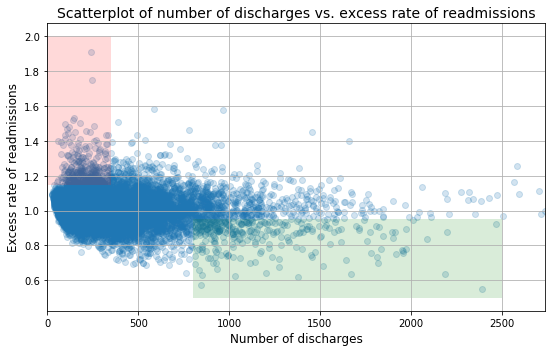

In [116]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Initial Observations

This analysis is concerned with the correlation between **number of discharges** and **excess readmission ratio**. Because of this, it makes sense to use the Pearson correlation coefficient as a test statistic and conduct hypothesis testing on it.

First, let's calculate the Pearson correlation coefficient for the given data.

In [118]:
discharges = clean_hospital_read_df['Number of Discharges']
excess_readmin_ratio = clean_hospital_read_df['Excess Readmission Ratio']
corr_mat = np.corrcoef(discharges, excess_readmin_ratio)
print(corr_mat[0,1])

nan


The result is "nan", likely because there are NaN values in the relevant columns in the data.

In [120]:
clean_hospital_read_df.head()

Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   
15606                       NaN                         NaN   
15615                       NaN                         NaN   
14551                       NaN                         NaN   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
16857                        NaN                     NaN  07/01/2010   
14582                        NaN                     NaN  07/01/2010   
15606                        NaN                     NaN  07/01/2010   
15615                        NaN                     NaN  07/01/2010   
14551                        NaN                     NaN  07/01/2010   

         End Date  
16857  06/30/2013  
14582  06/30/2013  
15606  06/30/2013  
15615  06/30/2013  
14551  06/30/2013

The NaN values for "Excess Readmission Ratio" should be removed.  Then, the Pearson correlation coefficient should be recalculated.

In [121]:
clean_hospital_read_df['Excess Readmission Ratio'].fillna(0, inplace=True)

In [122]:
corr_mat = np.corrcoef(discharges, excess_readmin_ratio)
print(corr_mat[0,1])


-0.004892144420094922


This number indicates that the number of discharges and the excess readmission ratio are weakly negatively correlated.

It is logical to remove observations where the number of discharges is 0 from the data.  This will change the Pearson correlation coefficient:

In [125]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]

In [126]:
discharges = clean_hospital_read_df['Number of Discharges']
excess_readmin_ratio = clean_hospital_read_df['Excess Readmission Ratio']

corr_mat = np.corrcoef(discharges, excess_readmin_ratio)
print(corr_mat[0,1])


-0.09739794351079356


This value shows a stronger negatively correlation that more accurately reflects the data.

The initial analysis states the following:
> In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1.

>In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

Let's check the data to make sure these statements are correct:

In [136]:
discharges_less_than_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
discharges_more_than_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [137]:
discharges_less_than_100['Excess Readmission Ratio'].mean()

1.0226183501683501

In [138]:
len(discharges_less_than_100[discharges_less_than_100["Excess Readmission Ratio"] > 1]) / len(discharges_less_than_100)

0.6321548821548821

In [129]:
discharges_more_than_1000['Excess Readmission Ratio'].mean()

0.9783354211663067

In [139]:
len(discharges_more_than_1000[discharges_more_than_1000["Excess Readmission Ratio"] > 1]) / len(discharges_more_than_1000)

0.4449244060475162

Yes, the initial observations and statistics from the preliminary analysis are correct.

## **Hypothesis Test**

The Pearson correlation coefficient for the cleaned data is -0.09739794351079356.  This will be the test statistic for hypothesis testing.

In [144]:
discharges = clean_hospital_read_df['Number of Discharges']
excess_readmin_ratio = clean_hospital_read_df['Excess Readmission Ratio']

corr_mat = np.corrcoef(discharges, excess_readmin_ratio)
corr1 = corr_mat[0,1]
print (corr1)

permutation_replicates = np.empty(10000)

for i in range(10000):
    discharges_permuted = np.random.permutation(discharges)
    corr = np.corrcoef(discharges_permuted, excess_readmin_ratio)
    permutation_replicates[i] = corr[0,1]
print (permutation_replicates)

p = np.sum(permutation_replicates <= corr1) / len(permutation_replicates)

print (p)


-0.09739794351079356
[-0.01331348  0.00245622  0.00839967 ...  0.00505247 -0.02037048
 -0.00722514]
0.0


The p-value is the probability of getting results as extreme or more extreme as the test statistic, given the null hypothesis is true.  The p-value is 0 (and is, as such less than ùõº = .01), so we can reject the null hypothesis (that is, that discharges and the excess readmission ratio are uncorrelated). Thus, the conclusion in the preliminary analysis that notes the correlation between these two variables is correct.  

## Discussion

While the correlation between the number of discharges and the excess readmission ratio is statistically significant, there is likely more to the picture concerning the reasons for which hospitals with fewer discharges have a greater readmission ratio.  The preliminary report concludes the following:

> Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

This may not be correct, as there could be other variables at play here.  For example, smaller hospitals in rural areas may get more readmissions because they are the only available hospitals, whereas more options exist in larger metropolitan areas. 

The scatterplot in the preliminary report plots each of the individual data points.  This visualization can be improved by incorporating a regression line which clearly shows the correlation between the two variables.

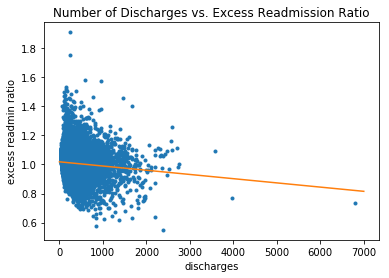

In [145]:
plt.plot(discharges, excess_readmin_ratio,  marker='.', linestyle='none')
_ = plt.xlabel('discharges')
_ = plt.ylabel('excess readmin ratio')
_ = plt.title("Number of Discharges vs. Excess Readmission Ratio")
a, b = np.polyfit(discharges, excess_readmin_ratio, 1)
x = np.array([0,7000])
y = a * x +  b
_ = plt.plot(x, y)